## Matias Padron Michelle Yanez - Algoritmo KNN 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
data = pd.read_csv('data_evaluacion_limpia_categorical.csv')
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,edad,clase_trabajo,peso_final,educacion,num_educacion,estado_civil,ocupacion,relacion,raza,ganancia_capital,perdida_capital,horas_por_semana,pais,sexo,salario
0,50,6,83311,10,13,3,4,1,5,0,0,13,39,True,False
1,38,4,215646,12,9,1,6,2,5,0,0,40,39,True,False
2,53,4,234721,2,7,3,6,1,3,0,0,40,39,True,False
3,28,4,338409,10,13,3,10,6,3,0,0,40,5,False,False
4,37,4,284582,13,14,3,4,6,5,0,0,40,39,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,4,215419,10,13,1,10,2,5,0,0,36,39,False,False
48837,64,4,321403,12,9,7,3,3,3,0,0,40,39,True,False
48838,38,4,374983,10,13,3,10,1,5,0,0,50,39,True,False
48839,44,4,83891,10,13,1,1,4,2,5455,0,40,39,True,False


In [3]:
x = data.drop(columns=['salario']).values
y = data['salario'].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

1. Para determinar el número de vecinos aplicamos la formula k = raiz_cuadrada(n)
2. Donde n representa el número de filas de nuestro data set en este caso = 48841
3. Por lo tanto k = 221

In [6]:
knn = KNeighborsClassifier(n_neighbors=221)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=221)

In [7]:
y_pred_knn = knn.predict(x_test)

In [8]:
# Evaluacion del modelo con 221 vecinos
print('Train Accuracy :', (knn.score(x_train, y_train))*100,"%")
print('Test Accuracy :', (knn.score(x_test, y_test))*100,"%")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Train Accuracy : 77.86650286650286 %
Test Accuracy : 78.01132873814237 %
Accuracy: 0.7801132873814236


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.78      1.00      0.87     11166
        True       0.98      0.08      0.14      3487

    accuracy                           0.78     14653
   macro avg       0.88      0.54      0.51     14653
weighted avg       0.83      0.78      0.70     14653



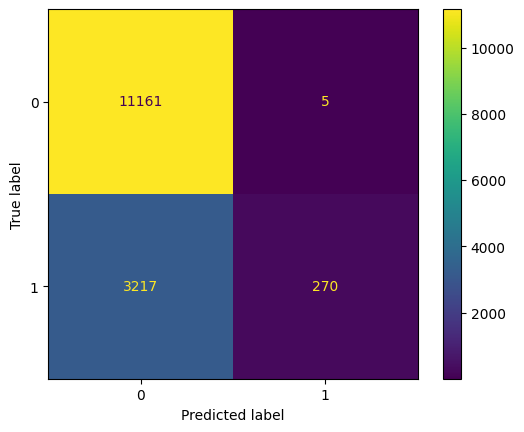

In [10]:
# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=[0, 1])
disp.plot()